# 행렬 조작: 생성하기, 채우기, 요소 접근하기, ROI

In [1]:
import cv2, numpy as np

In [2]:
image = np.full((480, 640, 3), 255, np.uint8)
cv2.imshow('white', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
image = np.full((480, 640, 3), (0, 0, 255), np.uint8)
cv2.imshow('red', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
image.fill(0)
cv2.imshow('black', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
image[240, 160] = image[240, 320] = image[240, 480] = (255, 255, 255)
cv2.imshow('black with white pixels', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
image[:, 320, :] = 255
cv2.imshow('blue with white line', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
image[100:600, 100:200, 2] = 255
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

# 데이터 타입과 스케일 변환

In [1]:
import cv2, numpy as np
image = cv2.imread('Lena.png')
print('shape:', image.shape)
print('Data type:', image.dtype)

cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

shape: (512, 512, 3)
Data type: uint8


In [2]:
image = image.astype(np.float32) / 255
print('shape:', image.shape)
print('Data type:', image.dtype)

shape: (512, 512, 3)
Data type: float32


In [3]:
cv2.imshow('image', np.clip(image*2, 0, 1))
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
image = (image * 255).astype(np.uint8)
print('shape:', image.shape)
print('Data type:', image.dtype)

cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

shape: (512, 512, 3)
Data type: uint8


# Numpy를 사용한 비이미지 데이터 영속성

In [1]:
import cv2, numpy as np

In [2]:
mat = np.random.rand(100, 100).astype(np.float32)
print('shape:', mat.shape)
print('Data Type:', mat.dtype)

shape: (100, 100)
Data Type: float32


In [3]:
np.savetxt('mat.csv', mat)

In [5]:
mat = np.loadtxt('mat.csv').astype(np.float32)
print('shape:', mat.shape)
print('Data Type:', mat.dtype)

shape: (100, 100)
Data Type: float32


# 이미지 채널 조작

In [1]:
import cv2, numpy as np
image = cv2.imread('Lena.png').astype(np.float32)/255
print('shape:', image.shape)

shape: (512, 512, 3)


In [2]:
image[:, :, [0,2]] = image[:, :, [2,0]]
image[:, :, 0] = (image[:, :, 0] * 0.9).clip(0, 1)
image[:, :, 1] = (image[:, :, 1] * 1.1).clip(0, 1)
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

# 이미지의 색 공간 변환

In [1]:
import cv2
import numpy as np

In [2]:
image = cv2.imread('Lena.png').astype(np.float32)/255
print('shape:', image.shape)
print('Data Type:', image.dtype)

shape: (512, 512, 3)
Data Type: float32


In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print('Converted to grayscale')
print('shape:', gray.shape)
print('Data Type:', gray.dtype)
cv2.imshow('gray', gray)
cv2.waitKey()
cv2.destroyAllWindows()

Converted to grayscale
shape: (512, 512)
Data Type: float32


In [4]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
print('Converted to HSV')
print('shape:', hsv.shape)
print('Data Type:', hsv.dtype)
cv2.imshow('hsv', hsv)
cv2.waitKey()
cv2.destroyAllWindows()

Converted to HSV
shape: (512, 512, 3)
Data Type: float32


In [5]:
hsv[:, :, 1] *= 2
from_hsv = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
print('Converted back to BGR from HSV')
print('shape:', from_hsv.shape)
print('Data Type:', from_hsv.dtype)
cv2.imshow('from_hsv', from_hsv)
cv2.waitKey()
cv2.destroyAllWindows()

Converted back to BGR from HSV
shape: (512, 512, 3)
Data Type: float32


# 감마 보정과 요소 단위의 수학

In [2]:
import cv2
import numpy as np
image = cv2.imread('Lena.png').astype(np.float32)/255

In [3]:
gamma = 0.5
corrected_image = np.power(image, gamma)

In [4]:
cv2.imshow('image', image)
cv2.imshow('corrected_image', corrected_image)
cv2.waitKey()
cv2.destroyAllWindows()

# 평균/분산 이미지 정규화

In [1]:
import cv2
import numpy as np
image = cv2.imread('Lena.png').astype(np.float32)/255

In [2]:
image -= image.mean()
image /= image.std()

# 이미지 히스토그램 계산

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grey = cv2.imread('Lena.png', 0)
cv2.imshow('original grey', grey)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
hist, bins = np.histogram(grey, 256, [0, 255])

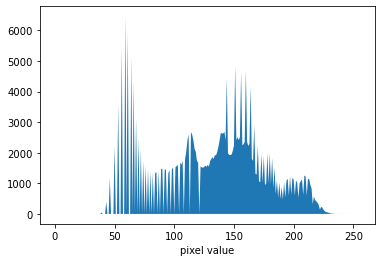

In [4]:
plt.fill(hist)
plt.xlabel('pixel value')
plt.show()

# 이미지 히스토그램 평활화

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grey = cv2.imread('Lena.png', 0)
cv2.imshow('original grey', grey)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
grey_eq = cv2.equalizeHist(grey)

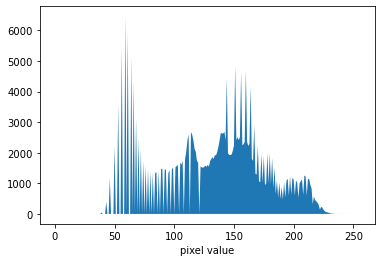

In [4]:
hist, bins = np.histogram(grey, 256, [0, 255])
plt.fill(hist)
plt.xlabel('pixel value')
plt.show()

In [5]:
cv2.imshow('equalized grey', grey_eq)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
color = cv2.imread('Lena.png')
hsv = cv2.cvtColor(color, cv2.COLOR_RGB2HSV)

In [7]:
hsv[..., 2] = cv2.equalizeHist(hsv[..., 2])
color_eq = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2.imshow('original color', color)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
cv2.imshow('equalized color', color_eq)
cv2.waitKey()
cv2.destroyAllWindows()

# 가우시안 필터, 중앙값 필터, 양방향 필터를 사용한 노이즈 제거

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('Lena.png').astype(np.float32)/255

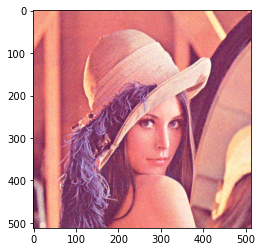

In [3]:
noised = (image + 0.2* np.random.rand(*image.shape).astype(np.float32))
noised = noised.clip(0,1)
plt.imshow(noised[:,:,[2,1,0]])
plt.show()

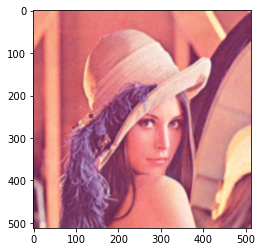

In [4]:
gauss_blur = cv2.GaussianBlur(noised, (7, 7), 0)
plt.imshow(gauss_blur[:,:,[2,1,0]])
plt.show()

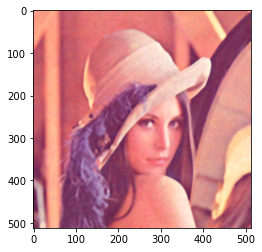

In [5]:
median_blur = cv2.medianBlur((noised*255).astype(np.uint8),7)
plt.imshow(median_blur[:,:,[2,1,0]])
plt.show()

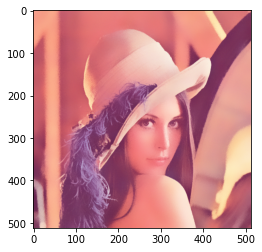

In [6]:
bilat = cv2.bilateralFilter(noised, -1, 0.3, 10)
plt.imshow(bilat[:,:,[2,1,0]])
plt.show()

# 소벨 필터로 이미지 경사도 계산

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('Lena.png',0)

In [3]:
dx = cv2.Sobel(image, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(image, cv2.CV_32F, 0, 1)

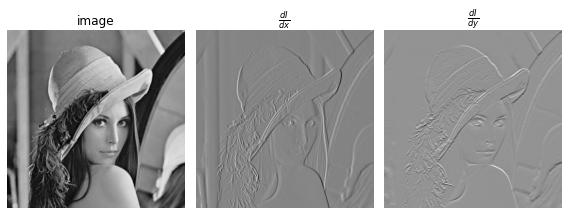

In [4]:
plt.figure(figsize=(8,3))
plt.subplot(131)
plt.axis('off')
plt.title('image')
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.imshow(dx, cmap='gray')
plt.title(r'$\frac{dI}{dx}$')
plt.subplot(133)
plt.axis('off')
plt.title(r'$\frac{dI}{dy}$')
plt.imshow(dy, cmap='gray')
plt.tight_layout()
plt.show()

# 자체 필터 생성과 적용

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
image = cv2.imread('Lena.png')

In [5]:
KSIZE = 11
ALPHA = 2
kernel = cv2.getGaussianKernel(KSIZE, 0)
kernel = -ALPHA * kernel @ kernel.T
kernel[KSIZE//2, KSIZE//2] += 1 + ALPHA

In [6]:
filtered = cv2.filter2D(image, -1, kernel)

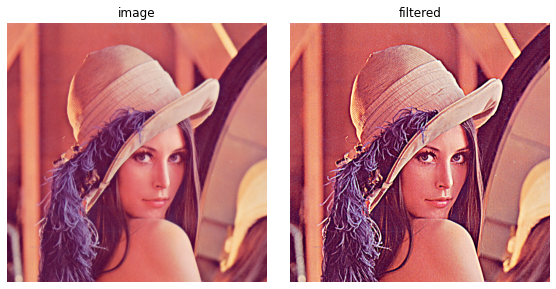

In [7]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.axis('off')
plt.title('image')
plt.imshow(image[:, :, [2, 1, 0]])
plt.subplot(122)
plt.axis('off')
plt.title('filtered')
plt.imshow(filtered[:, :, [2, 1, 0]])
plt.tight_layout(True)
plt.show()

# 실수 값으로 된 가버 필터로 이미지 처리

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
image = cv2.imread('Lena.png',0).astype(np.float32)/255

In [3]:
kernel = cv2.getGaborKernel((21, 21), 5, 1, 10, 1, 0, cv2.CV_32F)
kernel /= math.sqrt((kernel * kernel).sum())

In [4]:
filtered = cv2.filter2D(image, -1, kernel)

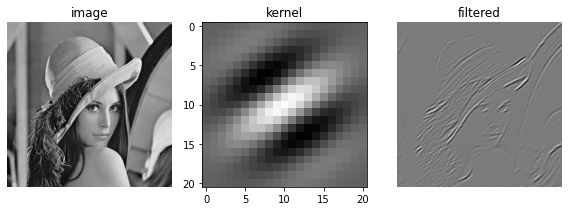

In [5]:
plt.figure(figsize=(8,3))
plt.subplot(131)
plt.axis('off')
plt.title('image')
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.title('kernel')
plt.imshow(kernel, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.title('filtered')
plt.imshow(filtered, cmap='gray')
plt.tight_layout()
plt.show()

# 이산 푸리에 변환을 사용한 공간 도메인과 주파수 도메인 간 변환

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('Lena.png',0).astype(np.float32)/255

In [3]:
fft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)

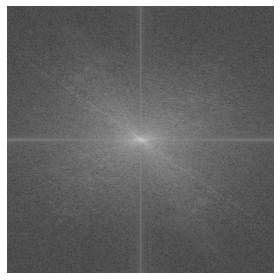

In [4]:
shifted = np.fft.fftshift(fft, axes=[0, 1])
magnitude = cv2.magnitude(shifted[:, :, 0], shifted[:, :, 1])
magnitude = np.log(magnitude)

plt.axis('off')
plt.imshow(magnitude, cmap='gray')
plt.tight_layout()
plt.show()

In [5]:
restored = cv2.idft(fft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

# 이미지 필터링을 위한 이미지 주파수 조작

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('Lena.png',0).astype(np.float32)/255

In [3]:
fft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)

In [5]:
fft_shift = np.fft.fftshift(fft, axes=[0, 1])

In [6]:
sz = 25
mask = np.zeros(fft_shift.shape, np.uint8)
mask[mask.shape[0]//2-sz:mask.shape[0]//2+sz, mask.shape[1]//2-sz:mask.shape[1]//2+sz, :] = 1
fft_shift *= mask

In [7]:
fft_shift = np.fft.ifftshift(fft_shift, axes=[0, 1])

In [8]:
filtered = cv2.idft(fft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

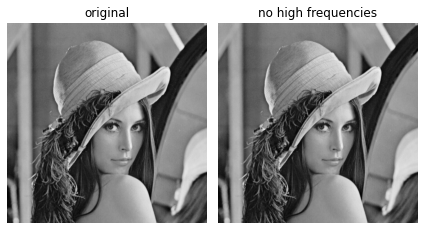

In [9]:
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.title('no high frequencies')
plt.imshow(filtered, cmap='gray')
plt.tight_layout()
plt.show()